# Exploratory Data Analysis

## Setup

In [1]:
# Importing libraries:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
# Importing our dataset

path = os.getcwd()

df = pd.read_csv(path + "/data/pga_ready_for_eda.csv")

In [4]:
df # We'll work from this dataset, the one we created in the ML notebook

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster
0,Aaron Baddeley,700.0,53.427778,293.677778,61.945556,28.295556,60.074444,71.008444,5103,2.0,21.0,0.473333,0.152444,-0.342667,-0.310333,0.333111,10419470,9,2
1,Aaron Watkins,46.0,63.030000,277.100000,62.250000,28.750000,59.530000,71.770000,126,0.0,1.0,0.402000,-0.589000,-0.568000,-0.707000,0.285000,217495,1,2
2,Aaron Wise,90.0,63.330000,302.900000,68.810000,29.150000,56.280000,70.247000,1086,1.0,3.0,0.238000,0.703000,0.410000,0.012000,0.042000,3486407,1,5
3,Abraham Ancer,149.0,64.530000,286.250000,64.150000,28.985000,59.680000,71.398000,736,0.0,4.0,-0.238500,-0.203500,0.150500,-0.133000,0.017500,1839506,2,4
4,Adam Hadwin,378.0,64.375000,289.600000,66.387500,28.847500,59.680000,70.768250,3207,1.0,13.0,0.319750,0.486250,0.075000,0.026250,0.043250,7392920,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Zac Blair,376.0,67.557500,275.150000,64.765000,28.802500,63.617500,71.106500,1631,0.0,4.0,0.240000,0.020000,-0.216750,-0.188750,0.186000,3266994,4,4
434,Zach Johnson,803.0,68.653333,282.144444,66.458889,28.727778,60.882222,70.107444,10935,5.0,42.0,0.362222,0.896778,0.052778,0.322222,0.165222,27540362,9,4
435,Zack Miller,86.0,57.060000,299.500000,61.790000,29.450000,54.260000,71.890000,290,0.0,1.0,-0.483000,-1.051000,0.057000,-0.612000,-0.012000,427341,1,1
436,Zecheng Dou,53.0,54.760000,291.900000,63.720000,30.000000,51.560000,72.773000,21,0.0,0.0,-0.667000,-1.198000,-0.079000,-0.265000,-0.187000,90993,1,1


In [5]:
# Explaination of columns:
#
# Year: The year of the tournament. This is a temporal dimension that might not directly contribute to 
# performance clustering unless you're interested in changes over time.
#
# Avg Distance: Average distance of tee shots. This measures the power of a golfer's drives.
#
# gir (Greens in Regulation): The percentage of times a golfer reaches the green in the number 
# of strokes deemed standard. It's a good indicator of approach play accuracy.
#
# Average Putts: The average number of putts per round. It reflects putting efficiency.
#
# Average Scrambling: The percentage of times a player misses the green in regulation but 
# still makes par or better. It's a measure of a player's ability to recover from a poor shot.
#
# Average Score: The average score per round. It's a direct indicator of overall performance.
#
# Points: Points earned in the season, often related to the FedExCup points system.
#
# Wins: The number of wins. This is a measure of ultimate success in tournaments.
#
# Top 10: The number of top-10 finishes. Like wins, it's a measure of consistent high performance.
#
# Average SG Putts (Strokes Gained: Putting): Measures a player's putting performance relative to the 
# field. It's a more sophisticated measure than average putts because it considers the difficulty of each putt.
#
# Average SG Total: Total strokes gained across all aspects of the game. It's an overall performance metric.
#
# SG:OTT (Strokes Gained: Off-The-Tee): Measures a player's performance off the tee.
#
# SG:APR (Strokes Gained: Approach): Measures a player's performance on approach shots.
#
# SG:ARG (Strokes Gained: Around-The-Green): Measures performance on shots taken around the green, 
# excluding putts.
#
# Money: The amount of prize money won. This is another indicator of success but can also reflect 
# the prestige of tournaments won.

## Exploring

In [16]:
# Masks for clusters

c1 = df["cluster"] == 1
c2 = df["cluster"] == 2
c3 = df["cluster"] == 3
c4 = df["cluster"] == 4
c5 = df["cluster"] == 5

In [19]:
# Creating dfs for each cluster

dfc1 = df.loc[c1]
dfc2 = df.loc[c2]
dfc3 = df.loc[c3]
dfc4 = df.loc[c4]
dfc5 = df.loc[c5]

## Values that weren't in our clusteralgo

In [ ]:
# From our ML notebook
# X = adf.select_dtypes("number").copy()
# X = X.drop(columns=["Rounds", "No Seasons", "Points", "Wins", "Top 10", "Money", "Average Putts"], axis=1)

<Axes: xlabel='cluster', ylabel='Wins'>

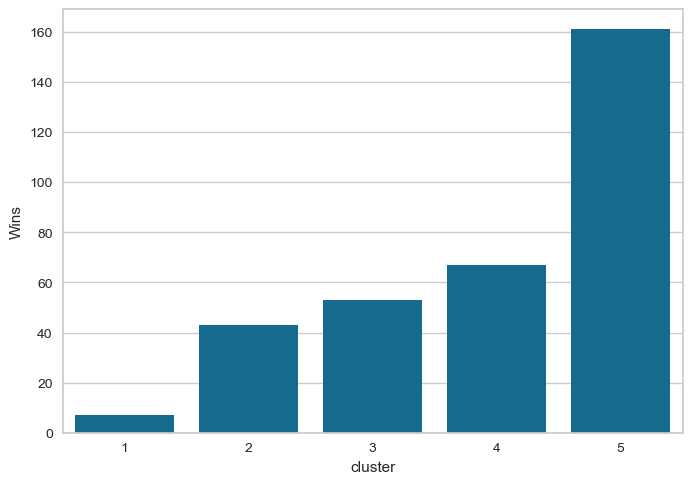

In [11]:
sns.barplot(data=df, x="cluster", y="Wins", estimator="sum", errorbar = None)

# Tier 5 is dominating

<Axes: xlabel='cluster', ylabel='Money'>

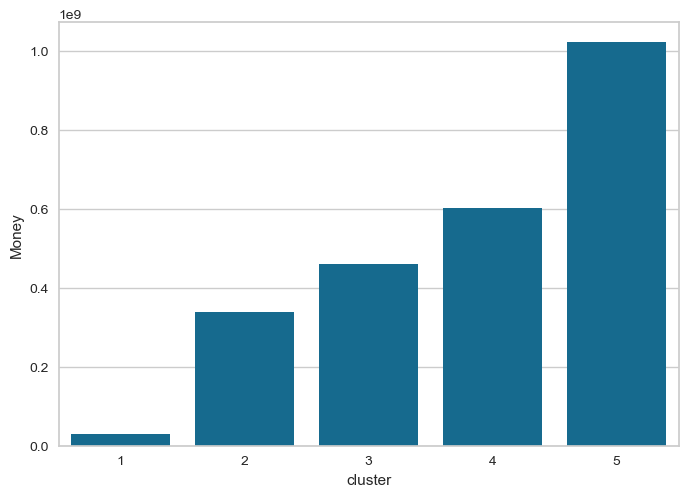

In [14]:
sns.barplot(data=df, x="cluster", y="Money", estimator="sum", errorbar = None)

# Tier 5 is dominating again

<Axes: xlabel='cluster', ylabel='No Seasons'>

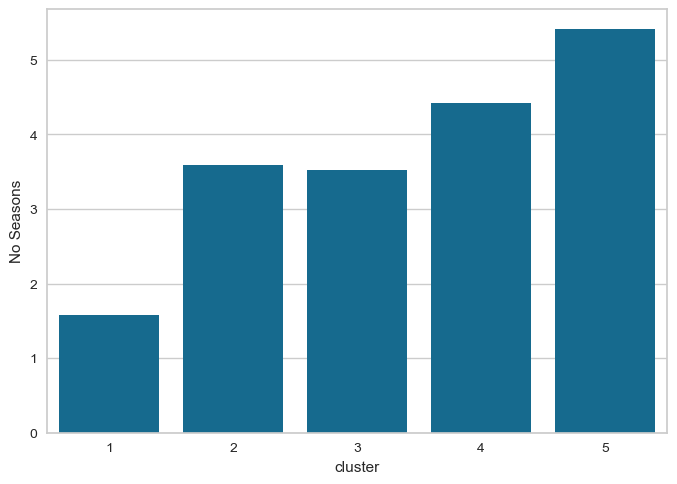

In [8]:
sns.barplot(data=df, x="cluster", y="No Seasons", estimator="mean", errorbar = None)

# NOTATION: While tier 4 has the highest number of seasons played / players
# Cluster has seen the metrics and predicted experience. 

<Axes: xlabel='cluster', ylabel='count'>

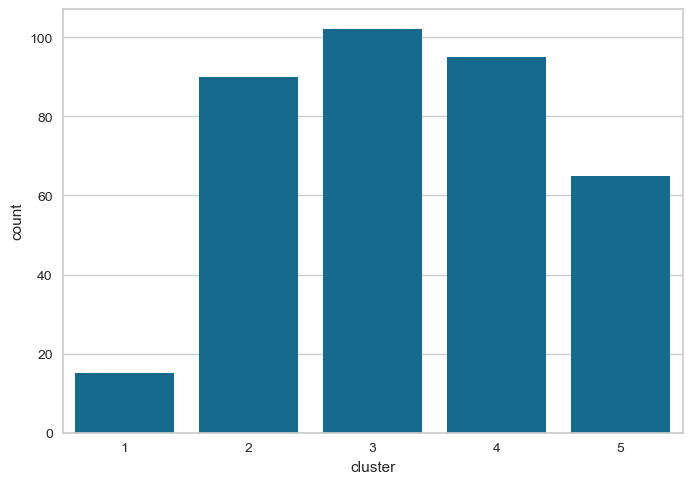

In [9]:
top10fins = df["Top 10"] > 0
top10 = df.loc[top10fins]
sns.countplot(data=top10, x="cluster")

## Values in our clusteralgo

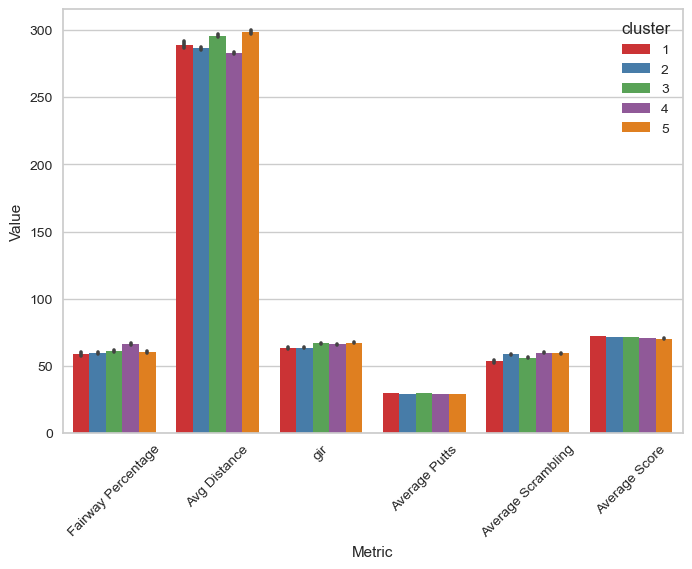

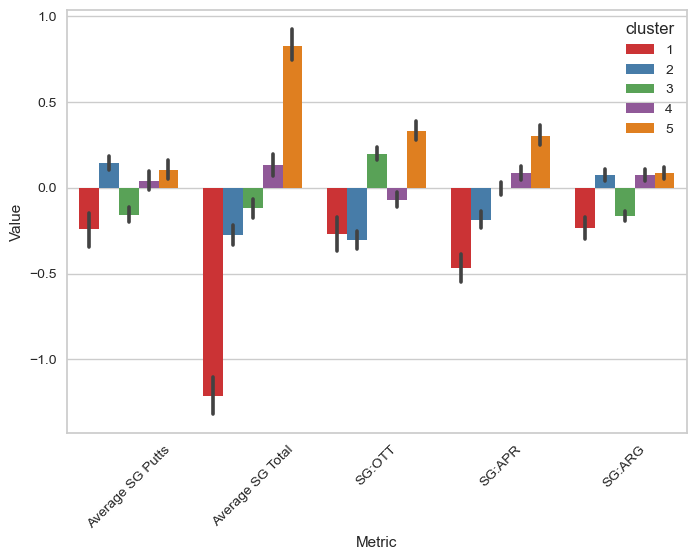

In [7]:
long_df = pd.melt(df, id_vars=['cluster'], value_vars=['Fairway Percentage', 'Avg Distance', 'gir',
       'Average Putts', 'Average Scrambling', 'Average Score'],
                  var_name='Metric', value_name='Value')

sns.barplot(data=long_df, x='Metric', y='Value', hue='cluster', palette="Set1")
plt.xticks(rotation=45) 
plt.show()

long_df = pd.melt(df, id_vars=['cluster'], value_vars=['Average SG Putts', 'Average SG Total', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'cluster'],
                  var_name='Metric', value_name='Value')

sns.barplot(data=long_df, x='Metric', y='Value', hue='cluster', palette="Set1")
plt.xticks(rotation=45) 
plt.show()

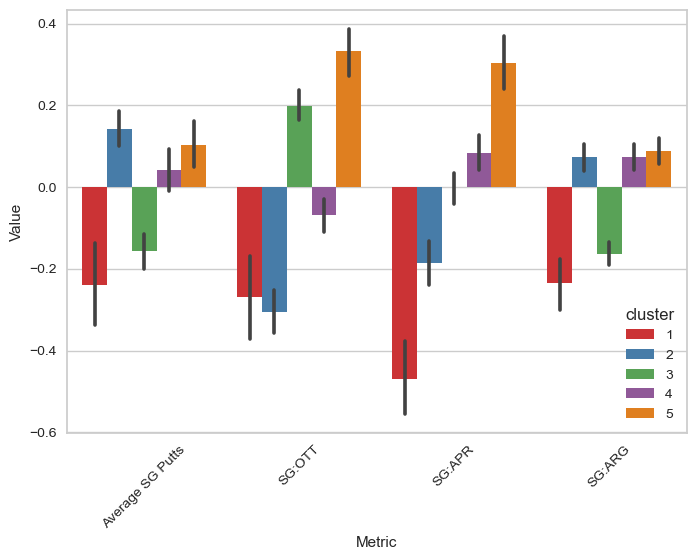

In [32]:
long_df = pd.melt(df, id_vars=['cluster'], value_vars=['Average SG Putts', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'cluster'],
                  var_name='Metric', value_name='Value')

sns.barplot(data=long_df, x='Metric', y='Value', hue='cluster', palette="Set1")
plt.xticks(rotation=45)  # Optionally rotate x-axis labels for clarity
plt.show()

In [ ]:
# NOTATIONS ON THE ABOVE
# The last one is super duper uber interesting... We see that in tier 5, they are dominant in Score Gained 
# total, off the tea and in the approach. Also around the green. 
# That said... Cluster 2 is dominant in putting and isnt too bad around the greens. They are worst in 
# off the tee. 
#
# Cluster 3 is bad at putts but not that bad off of the tee... Aroiund the green they are terrible, however. 

In [6]:
df.pivot_table(index = "Player Name", values = "Avg Distance").sort_values(by = "Avg Distance")

,Avg Distance
Player Name,
Craig Bowden,270.000000
Gavin Coles,271.200000
Brad Faxon,271.400000
Mike Weir,271.866667
Omar Uresti,272.000000
...,...
Dustin Johnson,311.975000
Keith Mitchell,312.600000
Brandon Hagy,312.700000


<Axes: xlabel='Avg Distance', ylabel='Fairway Percentage'>

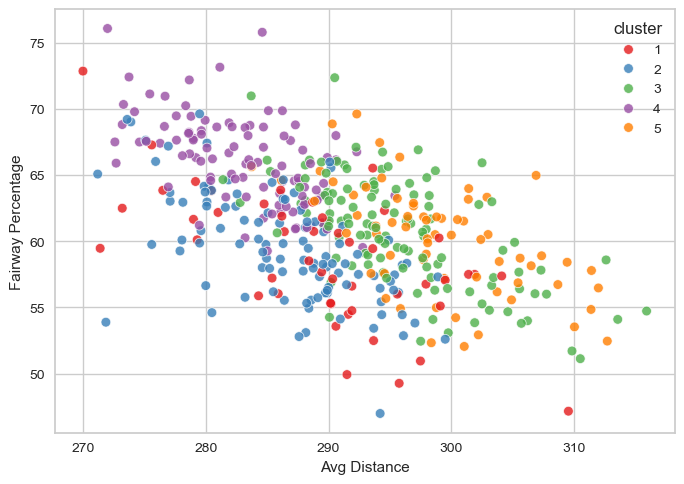

In [35]:
sns.scatterplot(data=df, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='Avg Distance', ylabel='Fairway Percentage'>

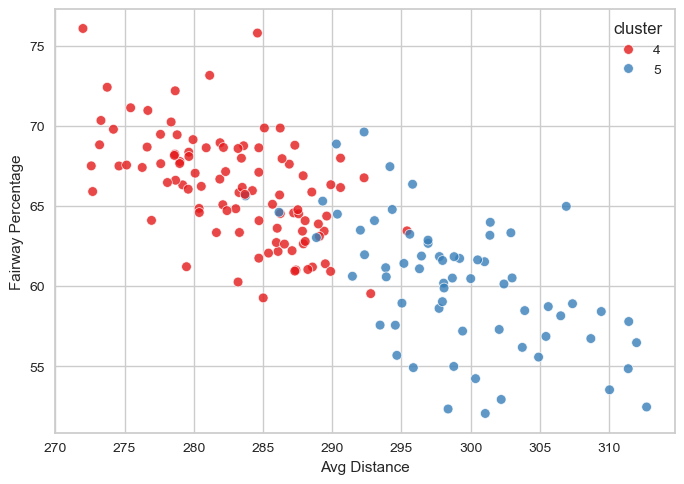

In [37]:
temp = df.loc[c5 | c4]

sns.scatterplot(data=temp, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", palette="Set1", alpha=.8)

# NOTATION
# This is super interesting! The difference between driving distances of cluster 4 and 5 is VASTLY different
# Cluster 5 hits bombs but can't hit farways, cluster 4 seems to be more conservative in their tee shots. 

<Axes: xlabel='Avg Distance', ylabel='Fairway Percentage'>

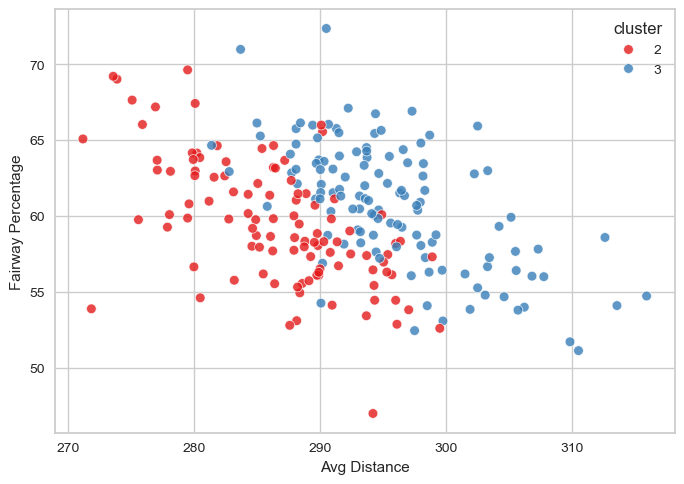

In [38]:
temp = df.loc[c2 | c3]

sns.scatterplot(data=temp, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", palette="Set1", alpha=.8)

# NOTATION 
# Cluster 2 and 3 hits about the same ammount of fairways but cluster 3 hits longer

<Axes: xlabel='SG:APR', ylabel='gir'>

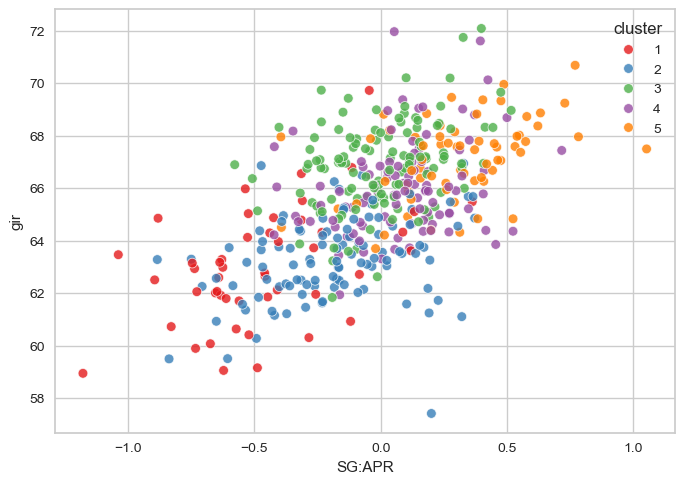

In [58]:
# gir (Greens in Regulation): The percentage of times a golfer reaches the green in the number 
# of strokes deemed standard. It's a good indicator of approach play accuracy.

sns.scatterplot(data=df, x = "SG:APR", y = "gir", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='SG:APR', ylabel='gir'>

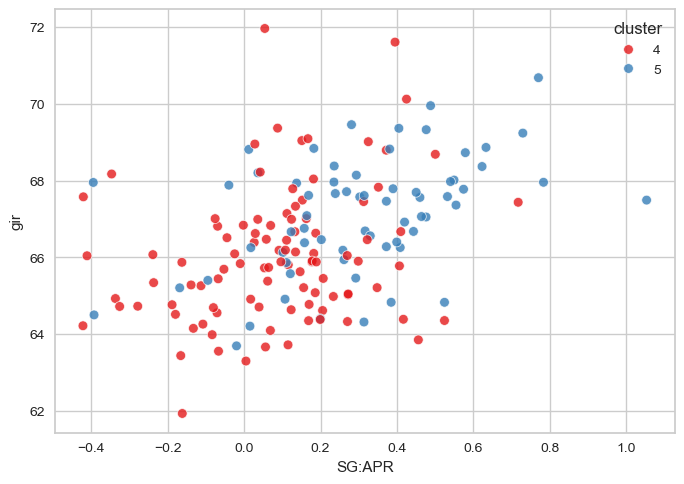

In [59]:
temp = df.loc[c5 | c4]

sns.scatterplot(data=temp, x = "SG:APR", y = "gir", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='SG:APR', ylabel='gir'>

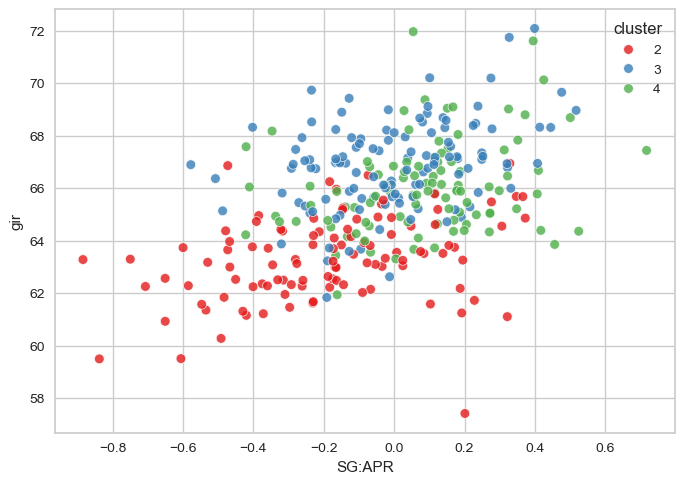

In [66]:
temp = df.loc[c2 | c3 | c4] # midfield

sns.scatterplot(data=temp, x = "SG:APR", y = "gir", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='SG:APR', ylabel='gir'>

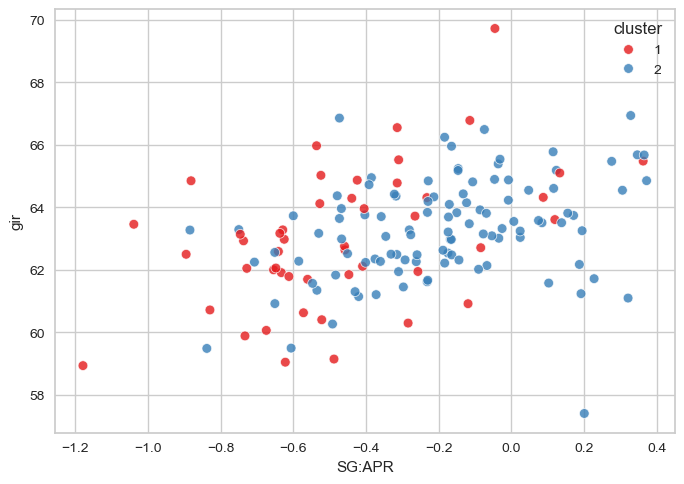

In [68]:
temp = df.loc[c1 | c2]

sns.scatterplot(data=temp, x = "SG:APR", y = "gir", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='SG:ARG', ylabel='Average SG Putts'>

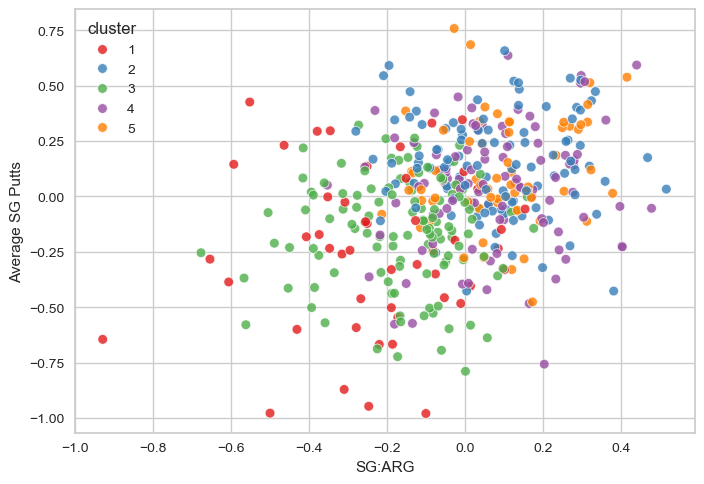

In [70]:
sns.scatterplot(data=df, x = "SG:ARG", y = "Average SG Putts", hue="cluster", palette="Set1", alpha=.8)

# Cluster 2 is an outlier here! They are almost as good around the green and at putting as 5 and 4. 

<Axes: xlabel='SG:ARG', ylabel='Average SG Putts'>

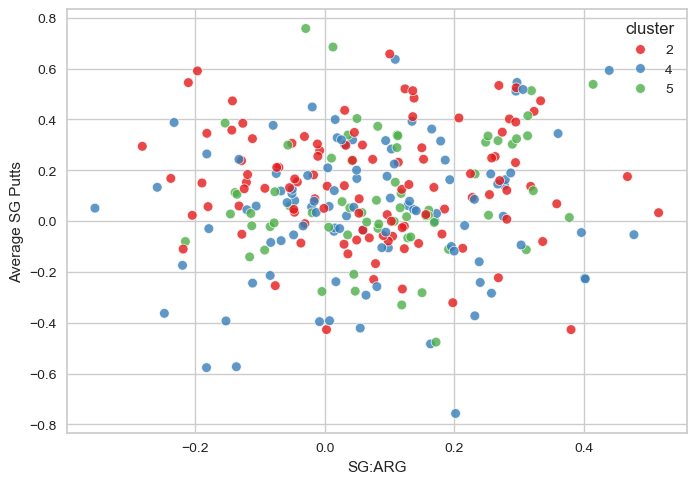

In [71]:
temp = df.loc[c2 | c4 | c5]

sns.scatterplot(data=temp, x = "SG:ARG", y = "Average SG Putts", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='SG:ARG', ylabel='Average SG Putts'>

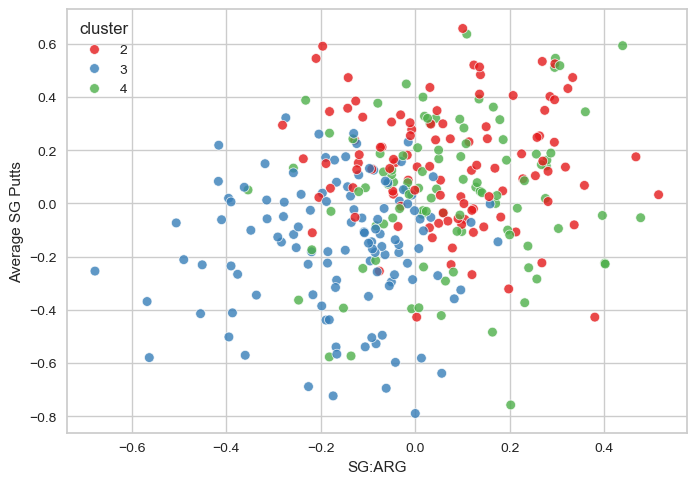

In [72]:
temp = df.loc[c2 | c4 | c3] # Looking at the entire MidField

sns.scatterplot(data=temp, x = "SG:ARG", y = "Average SG Putts", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='Avg Distance', ylabel='Average Scrambling'>

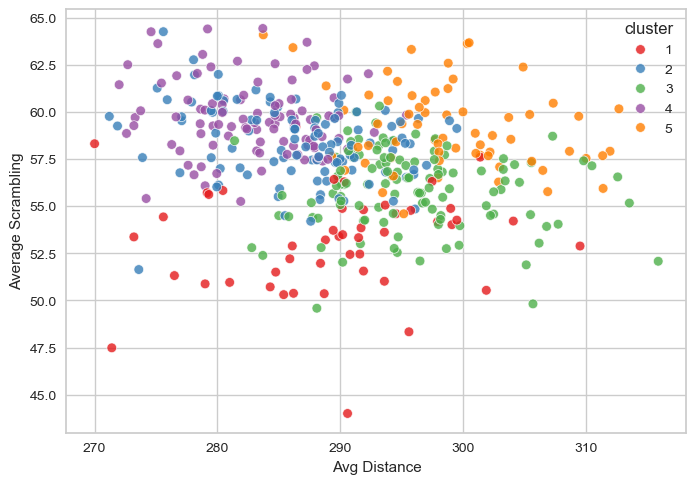

In [74]:
sns.scatterplot(data=df, x = "Avg Distance", y = "Average Scrambling", hue="cluster", palette="Set1", alpha=.8)